## **Fortress Control:** Base Rush vs Random Action

#### Predict winner of game based the following features:
* Player 0 score (Base Rush)
* Player 1 score (Random Action)
* Win Type
* Turn Unit Loss Occurred
* Unit Lost Type
* First Player with Unit Disband

####Classifiers used:
* Logistic Regression
* KNN
* Random Forest
* SVM
* XG Boost

In [0]:
# import Logistic Regression, KNN, Random forest, and SVM
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# import xgboost
import xgboost as xgb

# Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [0]:
url = 'https://raw.githubusercontent.com/shaunhyp57/LMCO-Everglades-Robot-Behavior-Analytics/master/analytics/ml_models/Fortress%20Control/datasets/node_4_control.csv'
cols = ['Game_ID','P0_type', 'P1_type','Turn_Count','Win_State', 'Winner', 'Player_0','Player_1','Controller','Turn_Num', 'Control_Value','Player_0 Avg Health', 'Player_1 Avg Health', 'P0_Tanks_Unit_Count', 'P0_Tanks_Avg_Health', 'P1_Tanks_Unit_Count', 'P1_Tanks_Avg_Health','P0_Strikers_Unit_Count', 'P0_Strikers_Avg_Health', 'P1_Strikers_Unit_Count', 'P1_Strikers_Avg_Health', 'P0_Controller_Unit_Count', 'P0_Controller_Avg_Health', 'P1_Controller_Unit_Count', 'P1_Controller_Avg_Health']
data = pd.read_csv(url, names=cols, header=None)

data.head()

,Game_ID,P0_type,P1_type,Turn_Count,Win_State,Winner,Player_0,Player_1,Controller,Turn_Num,Control_Value,Player_0 Avg Health,Player_1 Avg Health,P0_Tanks_Unit_Count,P0_Tanks_Avg_Health,P1_Tanks_Unit_Count,P1_Tanks_Avg_Health,P0_Strikers_Unit_Count,P0_Strikers_Avg_Health,P1_Strikers_Unit_Count,P1_Strikers_Avg_Health,P0_Controller_Unit_Count,P0_Controller_Avg_Health,P1_Controller_Unit_Count,P1_Controller_Avg_Health
0,28,random_actions,random_actions,150,1,0,1452,1269,0,118,112,0.765555,1.081143,\N,\N,\N,\N,\N,\N,\N,\N,6,0.7655554860830307,5,1.0811427712440491
1,40,random_actions,random_actions,150,1,0,2293,414,0,27,108,0.000000,1.085714,\N,\N,\N,\N,1,0,\N,\N,\N,\N,1,1.0857139825820923
2,41,random_actions,random_actions,150,1,0,1861,799,0,132,109,0.000000,0.952381,2,0,\N,\N,\N,\N,\N,\N,\N,\N,2,0.9523810148239136
3,45,random_actions,random_actions,150,1,0,1163,636,0,42,122,0.000000,2.103492,\N,\N,1,2.8666670322418213,4,0,\N,\N,\N,\N,2,1.721904993057251
4,53,random_actions,random_actions,150,1,1,151,1241,0,66,116,0.614912,1.785857,6,0.6149121721585592,2,2.6541669368743896,\N,\N,\N,\N,\N,\N,3,1.206984003384908


In [0]:
data.drop(data.columns[1:3], axis=1, inplace=True)

# Used to categorize the winner of the game based on the score of the player column
players={'Player_0':0, 'Player_1':1}

data.head()

,Game_ID,Turn_Count,Win_State,Winner,Player_0,Player_1,Controller,Turn_Num,Control_Value,Player_0 Avg Health,Player_1 Avg Health,P0_Tanks_Unit_Count,P0_Tanks_Avg_Health,P1_Tanks_Unit_Count,P1_Tanks_Avg_Health,P0_Strikers_Unit_Count,P0_Strikers_Avg_Health,P1_Strikers_Unit_Count,P1_Strikers_Avg_Health,P0_Controller_Unit_Count,P0_Controller_Avg_Health,P1_Controller_Unit_Count,P1_Controller_Avg_Health
0,28,150,1,0,1452,1269,0,118,112,0.765555,1.081143,\N,\N,\N,\N,\N,\N,\N,\N,6,0.7655554860830307,5,1.0811427712440491
1,40,150,1,0,2293,414,0,27,108,0.000000,1.085714,\N,\N,\N,\N,1,0,\N,\N,\N,\N,1,1.0857139825820923
2,41,150,1,0,1861,799,0,132,109,0.000000,0.952381,2,0,\N,\N,\N,\N,\N,\N,\N,\N,2,0.9523810148239136
3,45,150,1,0,1163,636,0,42,122,0.000000,2.103492,\N,\N,1,2.8666670322418213,4,0,\N,\N,\N,\N,2,1.721904993057251
4,53,150,1,1,151,1241,0,66,116,0.614912,1.785857,6,0.6149121721585592,2,2.6541669368743896,\N,\N,\N,\N,\N,\N,3,1.206984003384908


In [0]:
data = data.apply (pd.to_numeric, errors='coerce')
data.head()

,Game_ID,Turn_Count,Win_State,Winner,Player_0,Player_1,Controller,Turn_Num,Control_Value,Player_0 Avg Health,Player_1 Avg Health,P0_Tanks_Unit_Count,P0_Tanks_Avg_Health,P1_Tanks_Unit_Count,P1_Tanks_Avg_Health,P0_Strikers_Unit_Count,P0_Strikers_Avg_Health,P1_Strikers_Unit_Count,P1_Strikers_Avg_Health,P0_Controller_Unit_Count,P0_Controller_Avg_Health,P1_Controller_Unit_Count,P1_Controller_Avg_Health
0,28,150,1,0,1452,1269,0,118,112,0.765555,1.081143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.765555,5.0,1.081143
1,40,150,1,0,2293,414,0,27,108,0.000000,1.085714,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,1.085714
2,41,150,1,0,1861,799,0,132,109,0.000000,0.952381,2.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.952381
3,45,150,1,0,1163,636,0,42,122,0.000000,2.103492,NaN,NaN,1.0,2.866667,4.0,0.0,NaN,NaN,NaN,NaN,2.0,1.721905
4,53,150,1,1,151,1241,0,66,116,0.614912,1.785857,6.0,0.614912,2.0,2.654167,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.206984


In [0]:
data = data.fillna(0)

data.head()

,Game_ID,Turn_Count,Win_State,Winner,Player_0,Player_1,Controller,Turn_Num,Control_Value,Player_0 Avg Health,Player_1 Avg Health,P0_Tanks_Unit_Count,P0_Tanks_Avg_Health,P1_Tanks_Unit_Count,P1_Tanks_Avg_Health,P0_Strikers_Unit_Count,P0_Strikers_Avg_Health,P1_Strikers_Unit_Count,P1_Strikers_Avg_Health,P0_Controller_Unit_Count,P0_Controller_Avg_Health,P1_Controller_Unit_Count,P1_Controller_Avg_Health
0,28,150,1,0,1452,1269,0,118,112,0.765555,1.081143,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,6.0,0.765555,5.0,1.081143
1,40,150,1,0,2293,414,0,27,108,0.000000,1.085714,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.085714
2,41,150,1,0,1861,799,0,132,109,0.000000,0.952381,2.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,0.952381
3,45,150,1,0,1163,636,0,42,122,0.000000,2.103492,0.0,0.000000,1.0,2.866667,4.0,0.0,0.0,0.0,0.0,0.000000,2.0,1.721905
4,53,150,1,1,151,1241,0,66,116,0.614912,1.785857,6.0,0.614912,2.0,2.654167,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,1.206984


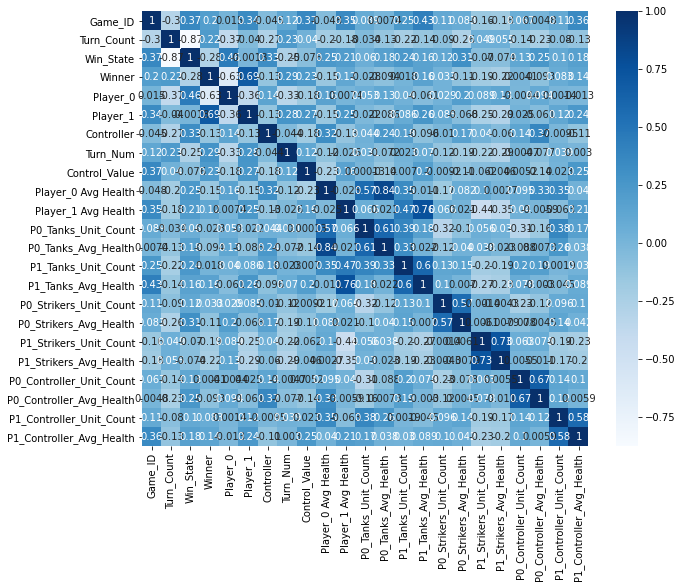

In [0]:
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

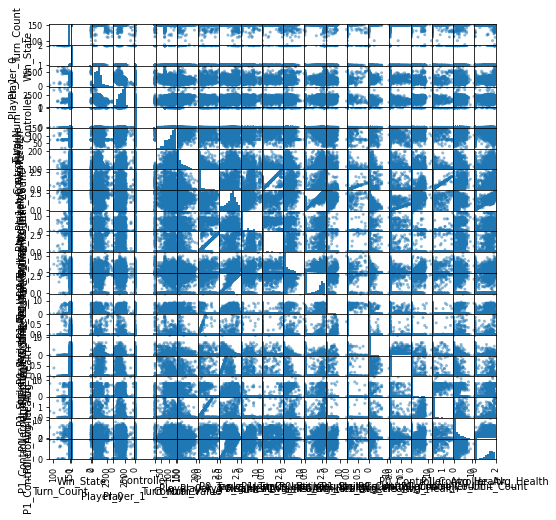

In [0]:
from pandas.plotting import scatter_matrix
feature_cols = ['Turn_Count','Win_State', 'Player_0','Player_1','Controller','Turn_Num', 'Control_Value','Player_0 Avg Health', 'Player_1 Avg Health', 'P0_Tanks_Unit_Count', 'P0_Tanks_Avg_Health', 'P1_Tanks_Unit_Count', 'P1_Tanks_Avg_Health','P0_Strikers_Unit_Count', 'P0_Strikers_Avg_Health', 'P1_Strikers_Unit_Count', 'P1_Strikers_Avg_Health', 'P0_Controller_Unit_Count', 'P0_Controller_Avg_Health', 'P1_Controller_Unit_Count', 'P1_Controller_Avg_Health']
scatter_matrix(data[feature_cols], figsize=(8,8));

In [0]:
# Total number of matches
n_matches = data.shape[0]

# Calculate number of features. '-1' because one is saved as target
n_features = data.shape[1] - 1

# Calculate matches won by Player 0
n_player0wins = len(data[data.Winner == 0])

# Calculate win rate for Player 0
win_rate = (float(n_player0wins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by Player 0: {}".format(n_player0wins))
print("Win rate of Player 0: {:.2f}%".format(win_rate))

Total number of matches: 1585
Number of features: 22
Number of matches won by Player 0: 424
Win rate of Player 0: 26.75%


In [0]:
#feature_cols = ['numberOfTurns', 'winType', 'player_0','player_1','unitLossTurn','unitLostPlayer','unitLostType']
X = data[feature_cols]
y = data['Winner']

# Standardising the data.
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(X), columns=feature_cols, index=data.index)

X.head()

,Turn_Count,Win_State,Player_0,Player_1,Controller,Turn_Num,Control_Value,Player_0 Avg Health,Player_1 Avg Health,P0_Tanks_Unit_Count,P0_Tanks_Avg_Health,P1_Tanks_Unit_Count,P1_Tanks_Avg_Health,P0_Strikers_Unit_Count,P0_Strikers_Avg_Health,P1_Strikers_Unit_Count,P1_Strikers_Avg_Health,P0_Controller_Unit_Count,P0_Controller_Avg_Health,P1_Controller_Unit_Count,P1_Controller_Avg_Health
0,0.186474,-0.213341,0.592276,-0.696550,-0.264996,0.181061,-0.463224,0.564511,-0.820342,-0.698469,-0.472255,-0.969835,-1.366739,-0.520042,-0.230223,-0.365131,-0.374976,2.093411,2.184178,1.648481,0.206831
1,0.186474,-0.213341,2.173376,-2.046304,-0.264996,-3.065100,-0.645592,-0.608559,-0.813637,-0.698469,-0.472255,-0.969835,-1.366739,-0.033175,-0.230223,-0.365131,-0.374976,-0.508986,-0.315415,-0.449345,0.213101
2,0.186474,-0.213341,1.361206,-1.438520,-0.264996,0.680471,-0.600000,-0.608559,-1.009183,-0.071054,-0.472255,-0.969835,-1.366739,-0.520042,-0.230223,-0.365131,-0.374976,-0.508986,-0.315415,0.075111,0.030225
3,0.186474,-0.213341,0.048949,-1.695842,-0.264996,-2.530018,-0.007306,-0.608559,0.679033,-0.698469,-0.472255,-0.462009,1.130184,1.427427,-0.230223,-0.365131,-0.374976,-0.508986,-0.315415,0.075111,1.085685
4,0.186474,-0.213341,-1.853634,-0.740753,-0.264996,-1.673888,-0.280857,0.333679,0.213190,1.183776,0.384819,0.045816,0.945092,-0.520042,-0.230223,-0.365131,-0.374976,-0.508986,-0.315415,0.599568,0.379432


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4, stratify = y)

In [0]:
#for measuring training time
from time import time 
#for measuring accuracy. Considers both precision and recall to compute score
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))
    
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label=0), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    # print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

Accuracy is important as it 

$Accuracy = \frac{Number of correct Predictions}{Total number of predictions}$

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

where *TP* = True Positive, *TN* = True Negative, *FP* = False Negative, *FN* = False Negative

In [0]:
# Initialize the four models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = KNeighborsClassifier(n_neighbors=10)
clf_C = RandomForestClassifier(max_depth = 2, random_state=0)
clf_D = SVC(random_state = 912, kernel='rbf')

# Boosting refers to this general problem of producing a very accurate prediction rule 
# by combining rough and moderately inaccurate rules-of-thumb
clf_E = xgb.XGBClassifier(seed = 2)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_D, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_E, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 1268. . .
Trained model in 0.0261 seconds
Made predictions in 0.0011 seconds.
F1 score and accuracy score for training set: 0.9985 , 0.9992.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 0.9884 , 0.9937.

Training a KNeighborsClassifier using a training set size of 1268. . .
Trained model in 0.0063 seconds
Made predictions in 0.1314 seconds.
F1 score and accuracy score for training set: 0.8453 , 0.9203.
Made predictions in 0.0218 seconds.
F1 score and accuracy score for test set: 0.8293 , 0.9117.

Training a RandomForestClassifier using a training set size of 1268. . .
Trained model in 0.1589 seconds
Made predictions in 0.0135 seconds.
F1 score and accuracy score for training set: 0.7256 , 0.8849.
Made predictions in 0.0090 seconds.
F1 score and accuracy score for test set: 0.7313 , 0.8864.

Training a SVC using a training set size of 1268. . .
Trained model in 0.0326 seconds
Made predictions in 

### **Grid Search Cross Validation**

We perform Grid Search CV, which is the process of performing hyper parameter tuning in order to determine the optimal values for a given model

In [0]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def train_grid_search(clf, params, X_train, y_train, X_test, y_test, kfolds):
    
    # Indicate the classifier and the training set size
    model_name = clf.__class__.__name__
    print("Training a {}. . .".format(model_name))
    # Make an f1 scoring function using 'make_scorer'
    f1_scorer = make_scorer(f1_score,pos_label=0)

    # Perform grid search on the classifier using the f1_scorer as the scoring method
    grid_search = GridSearchCV(
                          clf, 
                          scoring = f1_scorer, 
                          param_grid=params,
                          cv = kfolds
                  )
    # Fit the grid search object to the training data and find the optimal parameters
    grid_search = grid_search.fit(X_train,y_train)

    # Get the estimator
    grid_search_best = grid_search.best_estimator_
    #print(log_reg_best)

    # Report the final F1 score for training and testing after parameter tuning
    f1, acc = predict_labels(grid_search_best, X_train, y_train)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
        
    f1, acc = predict_labels(grid_search_best, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

    return model_name, grid_search, grid_search_best

def log_reg_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsLogReg = {
        'penalty' : ['l1', 'l2'],
        'C': [0.001,0.009,0.01,0.09,1,5,10,25],
        'solver' : ['liblinear'],
        'max_iter' : [100, 1000,2500, 5000]
    }

    # Initialize the classifier
    clf = LogisticRegression()

    return train_grid_search(clf, paramsLogReg, X_train, y_train, X_test, y_test, nfolds)


def knn_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsKNN = { 
        'n_neighbors' : [3,5,11,19],
        'weights' : ['uniform','distance'],
        'metric' : ['euclidean', 'manhattan']
    }

    # Initialize the classifier
    clf = KNeighborsClassifier()
    return train_grid_search(clf, paramsKNN, X_train, y_train, X_test, y_test, nfolds)

def random_forest_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    # Number of trees in random forest
    # n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    n_estimators = [50, 150, 250]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    paramsRandForest = {
      'n_estimators': [50, 150, 250],
      'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
      'min_samples_split': [2, 4, 6]
    }

    # Initialize the classifier
    clf = RandomForestClassifier(random_state=1)

    return train_grid_search(clf, paramsRandForest, X_train, y_train, X_test, y_test, nfolds)


def svm_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsSVM = {
      'C': [0.1,1, 10, 100], 
      'gamma': [1,0.1,0.01,0.001],
      'kernel': ['rbf', 'poly', 'sigmoid']
    }

    # Initialize the classifier
    clf = SVC()

    return train_grid_search(clf, paramsSVM, X_train, y_train, X_test, y_test, nfolds)


def xg_boost_gridsearch(X_train, y_train, X_test, y_test, nfolds):
    paramsXGB = {
      'learning_rate' : [0.1, 0.01, 0.05],
      'n_estimators' : range(60, 220, 40),
      'max_depth': range (2, 10, 1),
      'min_child_weight': [1,2,3,4,5],
      'gamma':[0.4],
      'subsample' : [0.8],
      'colsample_bytree' : [0.8],
      'scale_pos_weight' : [1],
      'reg_alpha':[1e-5]
    }
    """paramsXGB = {
      'n_estimators': [50,100,150,250,300,400,500,1000],
      'max_depth': [5,6,7,8,9,10],
      'max_delta_step': [0,1,2,3,4,5,6,7,8,9,10],
      'min_child_weight': [1,2,3,4,5],
      'subsample': [0.5,0.6,0.7,0.8,0.9,1],
      'colsample_bytree': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
      'colsample_bylevel': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
      'learning_rate': [0.002,0.005,0.007,0.008,0.01,0.05,0.07,0.1,0.25,0.5] 
    }"""

    # Initialize the classifier
    clf = xgb.XGBClassifier(seed=2)

    return train_grid_search(clf, paramsXGB, X_train, y_train, X_test, y_test, nfolds)

In [0]:
 from sklearn.model_selection import learning_curve
 
 def plt_learning_curve(clf, X, y, cv): 

     # Create CV training and test scores for various training set sizes
     train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                              X, 
                                                              y,
                                                              # Number of folds in cross-validation
                                                              cv=cv,
                                                              # Evaluation metric
                                                              scoring='f1_weighted',
                                                              # Use all computer cores
                                                              n_jobs=-1, 
                                                              # 50 different sizes of the training set
                                                              train_sizes=np.linspace(0.01, 1.0, 50))

     # Create means and standard deviations of training set scores
     train_mean = np.mean(train_scores, axis=1)
     train_std = np.std(train_scores, axis=1)

     # Create means and standard deviations of test set scores
     test_mean = np.mean(test_scores, axis=1)
     test_std = np.std(test_scores, axis=1)

     # Draw lines
     plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
     plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

     # Draw bands
     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
     plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

     # Create plot
     plt.title("Learning Curve")
     plt.xlabel("Training Set Size"), plt.ylabel("F1 Score"), plt.legend(loc="best")
     plt.tight_layout()
     
     return plt

In [0]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, scoring='f1_weighted',
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    # Plot n_samples vs fit_times
    # axes[1].grid()
    # axes[1].plot(train_sizes, fit_times_mean, 'o-')
    # axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
    #                      fit_times_mean + fit_times_std, alpha=0.1)
    # axes[1].set_xlabel("Training examples")
    # axes[1].set_ylabel("fit_times")
    # axes[1].set_title("Scalability of the model")
    # Plot fit_time vs score
    # axes[2].grid()
    # axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    # axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
    #                      test_scores_mean + test_scores_std, alpha=0.1)
    # axes[2].set_xlabel("fit_times")
    # axes[2].set_ylabel("Score")
    # axes[2].set_title("Performance of the model")

    return plt

We perform Grid Search CV on the model that produced the highest accuracy to see if we can get optimized solution with tuned parameters

In [0]:
kfolds = 10
name, log_reg, log_reg_best = log_reg_gridsearch(X_train, y_train, X_test, y_test, kfolds)

Training a LogisticRegression. . .
Made predictions in 0.0010 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 0.9884 , 0.9937.


In [0]:
from sklearn.metrics import plot_confusion_matrix

def display_confusion_matrix(name, clf, X_test, y_test):
    np.set_printoptions(precision=2)
    #plt.figure(figsize=(12,10))
    # Plot non-normalized confusion matrix
    title = "Confusion matrix using {}".format(name)

    #for title, normalize in titles_options:
    disp = plot_confusion_matrix(
                  clf, X_test, y_test,
                  cmap=plt.cm.Blues,
                  values_format = '.5g',
                  normalize=None
          )
    #disp.figure_.figure(figsize=(12,10))
    disp.ax_.set_title(title)

    #plt.show()

### Display Confusion Matrix

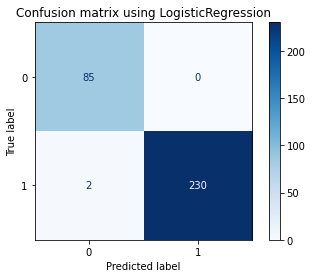

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

display_confusion_matrix(name, log_reg, X_test, y_test)

###Determine accuracy based on Voting Ensembling, using the hyperparameters for each model from Grid Search

In [0]:
# create a dictionary of the models
name, knn, knn_best = knn_gridsearch(X_train, y_train, X_test, y_test, kfolds)
print('')
name, rf, rf_best = random_forest_gridsearch(X_train, y_train, X_test, y_test, kfolds)
print('')
name, svm, svm_best = svm_gridsearch(X_train, y_train, X_test, y_test, kfolds)
print('')
name, xg_boost, xgb_best = xg_boost_gridsearch(X_train, y_train, X_test, y_test, kfolds)

Training a KNeighborsClassifier. . .
Made predictions in 0.0755 seconds.
F1 score and accuracy score for training set: 0.8889 , 0.9424.
Made predictions in 0.0207 seconds.
F1 score and accuracy score for test set: 0.8095 , 0.8991.

Training a RandomForestClassifier. . .
Made predictions in 0.0076 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0051 seconds.
F1 score and accuracy score for test set: 0.9759 , 0.9874.

Training a SVC. . .
Made predictions in 0.0063 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0022 seconds.
F1 score and accuracy score for test set: 0.9942 , 0.9968.

Training a XGBClassifier. . .
Made predictions in 0.0043 seconds.
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0019 seconds.
F1 score and accuracy score for test set: 0.9881 , 0.9937.


0.9968454258675079

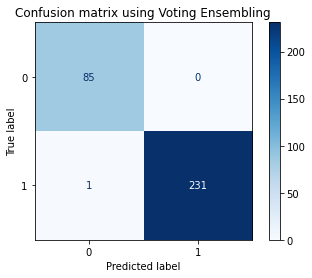

In [0]:
from sklearn.ensemble import VotingClassifier

estimators = [('log_reg', log_reg_best),('knn', knn_best), ('rf', rf_best), ('svm', svm_best)]
#estimators = [('log_reg', log_reg_best), ('rf', rf_best), ('svm', svm_best)]

# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(X_train, y_train)

name = "Voting Ensembling"

display_confusion_matrix(name, ensemble, X_test, y_test)
#test our model on the test data
ensemble.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


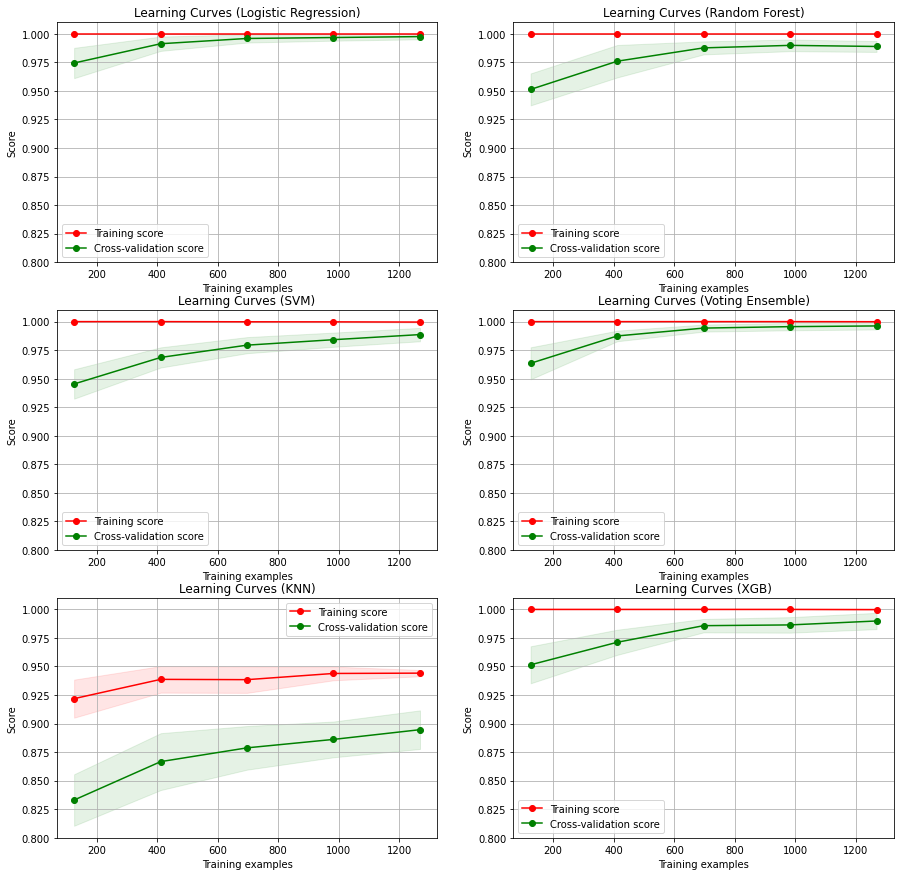

In [0]:
from sklearn.model_selection import ShuffleSplit

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = log_reg_best
plot_learning_curve(estimator, title, X, y, axes=axes[0,0], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (Random Forest)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = rf_best
plot_learning_curve(estimator, title, X, y, axes=axes[0,1], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm_best
plot_learning_curve(estimator, title, X, y, axes=axes[1,0], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (Voting Ensemble)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = ensemble
plot_learning_curve(estimator, title, X, y, axes=axes[1,1], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (KNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = knn_best
plot_learning_curve(estimator, title, X, y, axes=axes[2,0], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (XGB)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = xgb_best
plot_learning_curve(estimator, title, X, y, axes=axes[2,1], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=-1)

plt.show();

####XG Boost produced an accuracy of 97.97%. Using the Voting Ensembling model, we were able to increase the accuracy to 99.49%